# DL간단한 설명

In [3]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [38]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
type(x_train) #tensorflow 내부가 주로 numpy.array로 구성되어있음!

numpy.ndarray

In [39]:
print(x_train.shape)  #6만개 데이터가 28X28로 되어있다는 말!
print(np.max(x_train[0])) #이 값들 중에서 최고값을 찾는 과정

(60000, 28, 28)
255


5

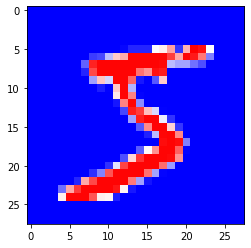

In [40]:
plt.imshow(x_train[0], cmap='bwr') 
y_train[0]  #x_train의 모양이 '5'라는 것을 라벨링해줌

In [30]:
#해당하는 값을 max값으로 나눠주면, max 값에 맞게 최고값이 1로 바뀜.
#가중치만 바꿔주는 것일 뿐, 차이의 비율은 같기 때문에 이미지 왜곡이 없음. 

x_train, x_test = x_train/255.0, x_test/255.0
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [32]:
#784개를 28by28로 Flatten 시키고, 최종적으로 알고 싶은 784를 10개로 분류할거니, 0번 픽셀의 0,1,2 .... 28by28이 n번 셀에 미치는 영향을 계산(W0(0~783).... (W9(0~783))
#Keras는 알아서 One-hot encoding과 Flatten 작업을 알아서 해준다.

layer = []
layer.append(keras.layers.Flatten(input_shape=(28,28)))  #28 by 28배열을 1차원으로 펼친 것을 풀어쓴 상태
layer.append(keras.layers.Dense(256, activation='relu'))
layer.append(keras.layers.Dropout(0.2))#전체 그림에서 일정 부분을 날리는 기능. 
layer.append(keras.layers.Dense(128, activation='relu'))#Dense의 영향은 시간차이만 있지, 아무 숫자만 적어도 되지만 컴퓨터가 2의 n승을 더 쉽게 이해하므로! 숫자가 너무 작지만 않으면 됨.
layer.append(keras.layers.Dense(10, activation='softmax')) #dense 층이 10개, softmax로
#sigmoid: 0,1 / softmax: 2 이상으로 분류
model = keras.models.Sequential(layer)

#데이터 성질을 잘 이해하고, 원천데이터가 얼마나 깨끗한지 바라보는 것이 중요함.

In [34]:
#역전파: 스텝을 주어, 만약 가중치값이 틀렸다면, learning rate를 가중치값에서 빼준다. 784개의 값이 맞아떨어질 때까지 빼주면 완료가 된다. 

model.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])

In [36]:
y_cate = keras.utils.to_categorical(y_train) #loss에 'sparse_categorical_crossentropy'를 쓰면 이 줄은 쓸 필요가 없음 (밑줄에 y_cate를 y_train으로 변경)

model.fit(x_train, y_cate, epochs=5) #epochs: 반복해서 학습을 하라는 뜻

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0900 - accuracy: 0.1124
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0900 - accuracy: 0.1124
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0900 - accuracy: 0.1124
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0900 - accuracy: 0.1124
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0900 - accuracy: 0.1124


### 참고자료

- 옵티마이저: https://keras.io/ko/optimizers/
- 손실함수: https://keras.io/ko/losses/
- 활성함수: https://keras.io/ko/activations/ (sigmoid: 두개 분리, relu, softmax: 두개 이상 분리하고 싶다)